In [1]:
import pandas as pd
import matplotlib.pyplot as plt

## Leitura do CSV

In [2]:
df = pd.read_csv('../data/input/read-database-licitacao.csv', encoding="utf-8", delimiter = ';')
df

/mnt/c/Programming/IC/M04/2021-python/venv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (50,51,52,53,54) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,id_licitacao,id_orgao,cod_orgao,nome_orgao_show,cod_nome_tipo_orgao_show,nome_tipo_orgao_show,nome_regiaoplanejamento_show,id_unidade,cod_unidade,dsc_unidade,...,ibge_mesorregiao_id_mesorregiao,nome_mesorregiao_show,ibge_regiao_imediata_id_regiao_imediata,nome_regiao_imediata_show,ibge_regiao_intermediaria_id_regiao_intermediaria,nome_regiao_intermediaria_show,id_uf,sigla_uf,longitude,latitude
0,399898,6,1,PREFEITURA MUNICIPAL DE ABADIA DOS DOURADOS,2,PREFEITURA MUNICIPAL,ALTO PARANAIBA,263051,7,SEC. MUN. DE ESPORTE E TURISMO,...,3105,TRIANGULO MINEIRO/ALTO PARANAIBA,310061,MONTE CARMELO,3111,UBERLANDIA,31,MG,-47.458.999.999.999.900,-183.533
1,399900,6,1,PREFEITURA MUNICIPAL DE ABADIA DOS DOURADOS,2,PREFEITURA MUNICIPAL,ALTO PARANAIBA,263051,7,SEC. MUN. DE ESPORTE E TURISMO,...,3105,TRIANGULO MINEIRO/ALTO PARANAIBA,310061,MONTE CARMELO,3111,UBERLANDIA,31,MG,-47.458.999.999.999.900,-183.533
2,399899,6,1,PREFEITURA MUNICIPAL DE ABADIA DOS DOURADOS,2,PREFEITURA MUNICIPAL,ALTO PARANAIBA,263051,7,SEC. MUN. DE ESPORTE E TURISMO,...,3105,TRIANGULO MINEIRO/ALTO PARANAIBA,310061,MONTE CARMELO,3111,UBERLANDIA,31,MG,-47.458.999.999.999.900,-183.533
3,158980,9,2,PREFEITURA MUNICIPAL DE ABAETE,2,PREFEITURA MUNICIPAL,CENTRAL,115327,2002,SECRETARIA DE ADMINISTRAÇÃO E RECURSOS HUMANOS,...,3106,CENTRAL MINEIRA,310070,ABAETE,3113,DIVINOPOLIS,31,MG,-453.587,-191.027
4,158981,9,2,PREFEITURA MUNICIPAL DE ABAETE,2,PREFEITURA MUNICIPAL,CENTRAL,115327,2002,SECRETARIA DE ADMINISTRAÇÃO E RECURSOS HUMANOS,...,3106,CENTRAL MINEIRA,310070,ABAETE,3113,DIVINOPOLIS,31,MG,-453.587,-191.027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363567,722557,2143,20,SERVICO MUNICIPAL FUNERARIO E DE ORGANIZACAO D...,3,AUTARQUIA (EXCETO RPPS),SUL,373104,22001,SERVICO FUNERARIO,...,3110,SUL/SUDOESTE DE MINAS,310040,VARGINHA,3108,VARGINHA,31,MG,-454.091,-215.575
363568,722264,2180,2,PREFEITURA MUNICIPAL DE VIRGINIA,2,PREFEITURA MUNICIPAL,SUL,367440,12000,DEPARTAMENTO DE ASSISTÊNCIA SOCIAL,...,3110,SUL/SUDOESTE DE MINAS,310053,SAO LOURENCO,3109,POUSO ALEGRE,31,MG,-451.085,-223.419
363569,722265,2180,2,PREFEITURA MUNICIPAL DE VIRGINIA,2,PREFEITURA MUNICIPAL,SUL,367430,4000,FUNDO DE SAÚDE,...,3110,SUL/SUDOESTE DE MINAS,310053,SAO LOURENCO,3109,POUSO ALEGRE,31,MG,-451.085,-223.419
363570,722263,2180,2,PREFEITURA MUNICIPAL DE VIRGINIA,2,PREFEITURA MUNICIPAL,SUL,367459,3000,SERVIÇOS DE EDUCAÇÃO,...,3110,SUL/SUDOESTE DE MINAS,310053,SAO LOURENCO,3109,POUSO ALEGRE,31,MG,-451.085,-223.419


## Filtragem das Licitações por Cidade

### Número de Licitações Por Cidade

#### Tabela

In [3]:
licitacoesPorCidade = df[['nome_cidade_show', 'id_licitacao']]                                                   # Filtra as colunas do Dataframe
licitacoesPorCidade = licitacoesPorCidade.rename({'nome_cidade_show': 'Nome da Cidade'}, axis='columns')         # Renomeia as colunas do Dataframe
licitacoesPorCidade = licitacoesPorCidade.groupby(['Nome da Cidade'])                                            # Agrupa os dados por cidade
licitacoesPorCidade = licitacoesPorCidade.size()                                                                 # Cria uma coluna de contagem de registros de licitações agrupados por cidade e transformando o Dataframe em uma Série
licitacoesPorCidade = licitacoesPorCidade.reset_index(name="Número de Licitações")                               # Renomeia a coluna criada no comando anterior transformando a Série de volta em Dataframe
licitacoesPorCidade

,Nome da Cidade,Número de Licitações
0,ABADIA DOS DOURADOS,297
1,ABAETE,357
2,ABRE CAMPO,378
3,ACAIACA,345
4,ACUCENA,303
...,...,...
848,VIRGINOPOLIS,331
849,VIRGOLANDIA,122
850,VISCONDE DO RIO BRANCO,603
851,VOLTA GRANDE,266


#### Gráfico

<AxesSubplot:xlabel='Municípios', ylabel='Número de Licitações'>

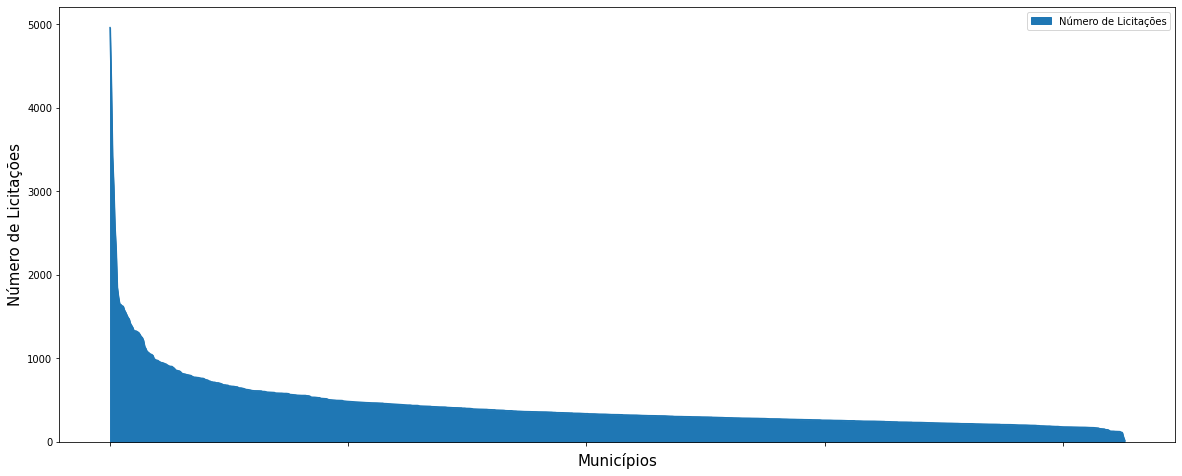

In [4]:
plotagemGraficoCidade = licitacoesPorCidade.sort_values(by = ['Número de Licitações'], ascending = False).plot(x = "Nome da Cidade", y = 'Número de Licitações', kind="area", figsize=(20, 8))
plotagemGraficoCidade.set_xticklabels([])
plotagemGraficoCidade.xaxis.label.set_size(15)
plotagemGraficoCidade.yaxis.label.set_size(15)
plotagemGraficoCidade.set_xlabel('Municípios')
plotagemGraficoCidade.set_ylabel('Número de Licitações')
plotagemGraficoCidade

### Top 10 Cidades com Mais Licitações

In [5]:
licitacoesPorCidade.sort_values(by = ['Número de Licitações'], ascending = False).head(10)

,Nome da Cidade,Número de Licitações
824,UBERLANDIA,4962
65,BELO HORIZONTE,4286
823,UBERABA,3429
605,POCOS DE CALDAS,3065
506,MURIAE,2582
834,VARGINHA,2302
493,MONTE ALEGRE DE MINAS,1852
382,ITAUNA,1738
362,ITABIRITO,1653
280,EXTREMA,1644


### Top 10 Cidades com Menos Licitações

In [6]:
licitacoesPorCidade.sort_values(by = ['Número de Licitações']).head(10)

,Nome da Cidade,Número de Licitações
845,VIEIRAS,18
33,ANTONIO PRADO DE MINAS,57
772,SENADOR CORTES,111
801,TAPIRAI,115
849,VIRGOLANDIA,122
150,CARMESIA,122
402,JENIPAPO DE MINAS,123
497,MONTE FORMOSO,124
804,TEIXEIRAS,124
509,NACIP RAYDAN,126


## Filtragem das Licitações por Modalidade

### Número de Licitações Por Modalidade

#### Tabela

In [7]:
licitacoesPorModalidade = df[['nome_modalidade_show', 'id_licitacao']].rename({'nome_modalidade_show': 'Modalidade'}, axis='columns').groupby(['Modalidade']).size().reset_index(name="Número de Licitações")
licitacoesPorModalidade

,Modalidade,Número de Licitações
0,CONCORRENCIA,5627
1,CONCURSO,88
2,CONVITE,24588
3,LEILAO,667
4,PREGAO ELETRONICO,18947
5,PREGAO PRESENCIAL,286243
6,TOMADA DE PRECOS,27412


#### Gráfico

<AxesSubplot:xlabel='Municípios', ylabel='Número de Licitações'>

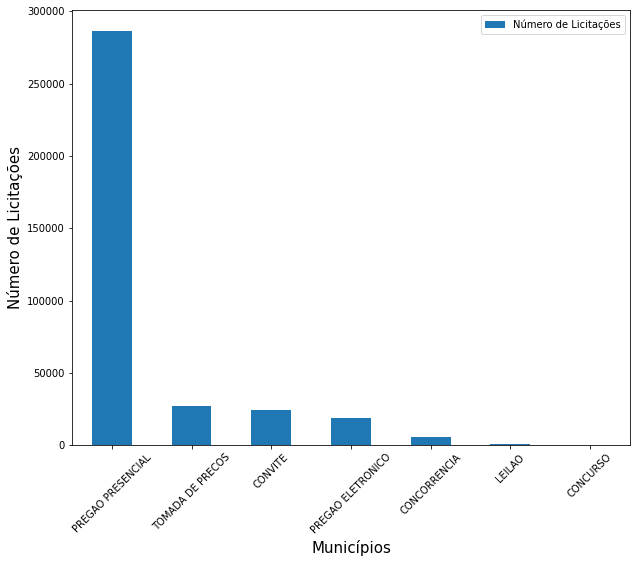

In [8]:
plotagemGraficoModalidade = licitacoesPorModalidade.sort_values(by = ['Número de Licitações'], ascending = False).plot(x = "Modalidade", y = 'Número de Licitações', kind="bar", figsize=(10, 8))
plotagemGraficoModalidade.set_xlabel('Municípios')
plotagemGraficoModalidade.set_ylabel('Número de Licitações')
plotagemGraficoModalidade.xaxis.label.set_size(15)
plotagemGraficoModalidade.yaxis.label.set_size(15)
plotagemGraficoModalidade.tick_params(axis='x', labelrotation=45)
plotagemGraficoModalidade

## Filtragem das Licitações por Ano

### Número de Licitações Por Ano

#### Tabela

In [9]:
licitacoesPorAno = df[['ano_processo', 'id_licitacao']].rename({'ano_processo': 'Ano da Licitação'}, axis='columns').groupby(['Ano da Licitação']).size().reset_index(name="Número de Licitações").sort_values(by = ['Ano da Licitação'], ascending = False)
licitacoesPorAno

,Ano da Licitação,Número de Licitações
13,2020,28843
12,2019,54426
11,2018,55622
10,2017,60876
9,2016,44382
8,2015,52243
7,2014,62861
6,2013,4157
5,2012,64
4,2011,43


#### Gráfico

<AxesSubplot:xlabel='Ano da Licitação', ylabel='Número de Licitações'>

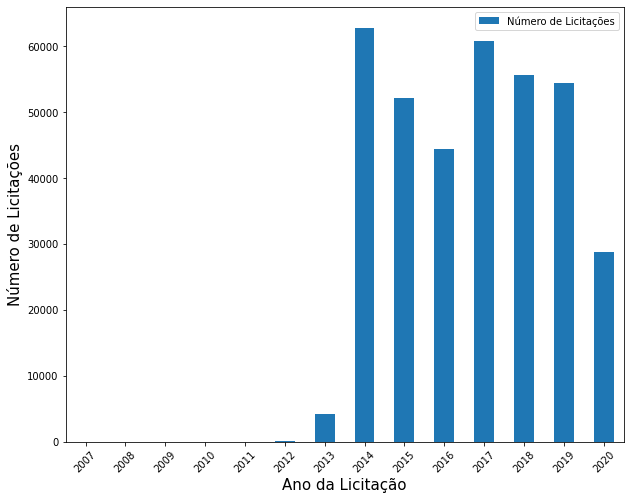

In [10]:
plotagemGraficoAno = licitacoesPorAno.sort_values(by = ['Ano da Licitação']).plot(x = "Ano da Licitação", y = 'Número de Licitações', kind="bar", figsize=(10, 8))
plotagemGraficoAno.set_xlabel('Ano da Licitação')
plotagemGraficoAno.set_ylabel('Número de Licitações')
plotagemGraficoAno.xaxis.label.set_size(15)
plotagemGraficoAno.yaxis.label.set_size(15)
plotagemGraficoAno.tick_params(axis='x', labelrotation=45)
plotagemGraficoAno